# Sampling random numbers from a given distribution

Let 
$$
f (x) = (1 − x)a + xb
$$ 
with $ 0 \leq x \leq 1$. Let's first find the normalization constant:
$$
C = \int_0^1 f(x) dx = \int_0^1 (x(b-a) + a) dx =  \frac{1}{2}(b-a) + a = \frac{1}{2}(b+a)
$$
So that finally
$$
\rho(x)= \frac{1}{C} f(x)
$$
The cumulative functions is simply given by:
$$
F(x) = \int_0^x f(x) = \frac{1}{C} \int_0^x (x'(b-a) + a) dx' = \frac{2}{b+a}(\frac{1}{2}x^2(b-a) + ax) = \frac{b-a}{b+a} x^2 + \frac{2a}{a+b}x
$$
injective in $[0,1]$. To invert it,
$$
(a+b)y = (b-a) x^2 + 2a x
$$
$$
x^2 + \frac{2a}{b-a} x - \frac{b+a}{b-a} y = 0
$$
Solving, one get:
$$
F^{-1}(x) = \frac{\sqrt{a^2 (1-x) + b^2 x}-a}{b-a}
$$

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

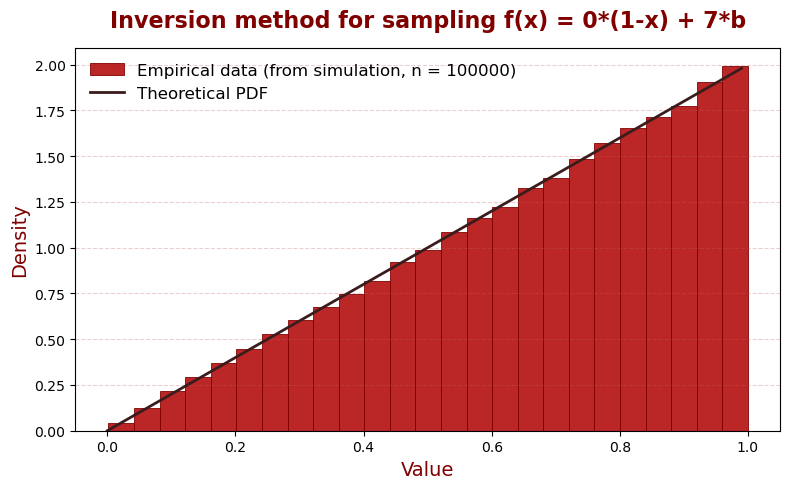

In [3]:
def sampleCustom(n,a,b):
    #First of all, draw n uniform random number between 0 and 1
    u = np.random.uniform(0,1,n)
    #Then, use the inverse CDF to transform the uniform random number into a sample from
    z = (np.sqrt(a**2 * (1-u) + b**2 * u) - a) / (b - a)
    return z

a, b = 0, 7
samples = sampleCustom(n=100000, a=a, b=b)

plt.figure(figsize=(8,5))

# Histogram
plt.hist(samples, bins=25,  density=True, alpha=0.85, color='#B00000', edgecolor='#800000', linewidth=0.7, label="Empirical data (from simulation, n = 100000)")

# theoretical pdf
support = [i/100 for i in range(100)]
pdf = [(1-s) * a + s*b for s in support]
normalized_pdf = [p * 2 /(b+a) for p in pdf]

plt.plot(support, normalized_pdf, color="#3B1C1C", linewidth=2.0, label="Theoretical PDF")
plt.title("Inversion method for sampling f(x) = 0*(1-x) + 7*b", fontsize=16, weight='bold', color='#800000',pad=15)
plt.xlabel("Value", fontsize=14, color='#800000')
plt.ylabel("Density", fontsize=14, color='#800000')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='#C06060')
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
#plt.savefig("exercise1_1.pdf", format='pdf') 
plt.show()


# Estimating areas by MC

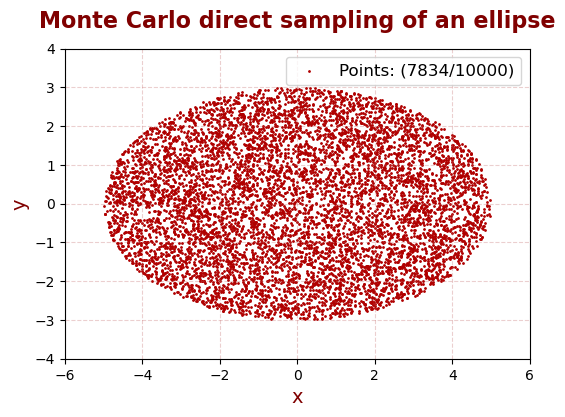

In [ ]:
def computeMCarea(n, a, b):
    points_in = []
    x = np.random.uniform(-a, a, n)
    y = np.random.uniform(-b, b, n)
    inside = (x**2 / a**2 + y**2 / b**2) <= 1
    points_in.extend(zip(x[inside], y[inside]))
    frac_inside = np.sum(inside) / n
    area_est = frac_inside * (4 * a * b)
    return area_est, points_in  # Return also the points inside the ellipse for plotting

n = 10000
_, p = computeMCarea(n, a=5, b=3)
plt.figure(figsize=(6,6))
x_in, y_in = zip(*p)
plt.scatter(x_in, y_in, color='#B00000', s=1, label=f"Points: ({len(p)}/{n})")
plt.xlim(-6, 6)
plt.ylim(-4, 4)
plt.title("Monte Carlo direct sampling of an ellipse", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("x", fontsize=14, color='#800000')
plt.ylabel("y", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize=12)
#plt.savefig("exercise1_2.pdf", format='pdf')
plt.show()

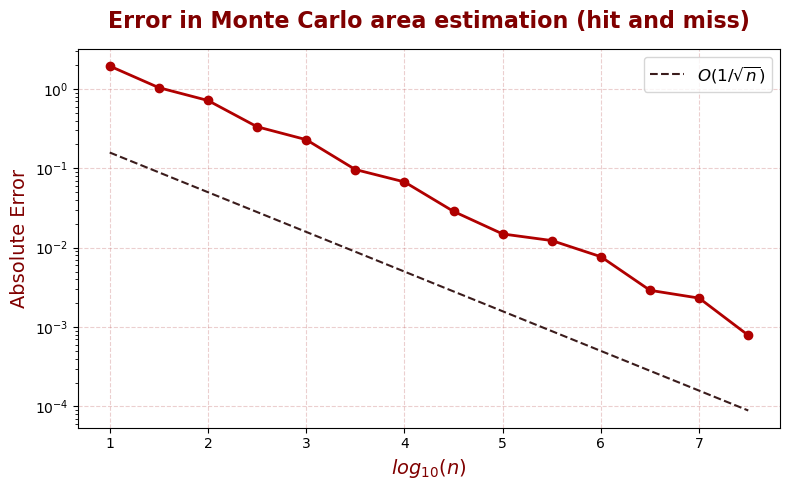

In [7]:
# Store the errors
diff = []
for exp in np.arange(1,8,0.5):
    true_area = math.pi * 5 * 1
    n = 10**exp
    tmp = []
    for k in range(10):
        area, _ = computeMCarea(int(n), a=5, b=1)
        tmp.append(abs(area - true_area))
    area, _ = computeMCarea(int(n), a=5, b=1)
    diff.append(np.mean(tmp))

# Plot it
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,8,0.5), diff, marker='o', color='#B00000', linewidth=2.0)
plt.yscale('log')
plt.title("Error in Monte Carlo area estimation (hit and miss)", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("$log_{10}(n)$", fontsize=14, color='#800000')
plt.ylabel("Absolute Error", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout()
n_values = np.arange(1,8,0.5)
ref_line = [0.5 * 10**(-exp/2) for exp in n_values]
plt.plot(n_values, ref_line, linestyle='--', color='#3B1C1C', label="$O(1/\\sqrt{n})$")
plt.legend(fontsize=12)
#plt.savefig("exercise1_3.pdf", format='pdf') 
plt.show()


---
### Part II

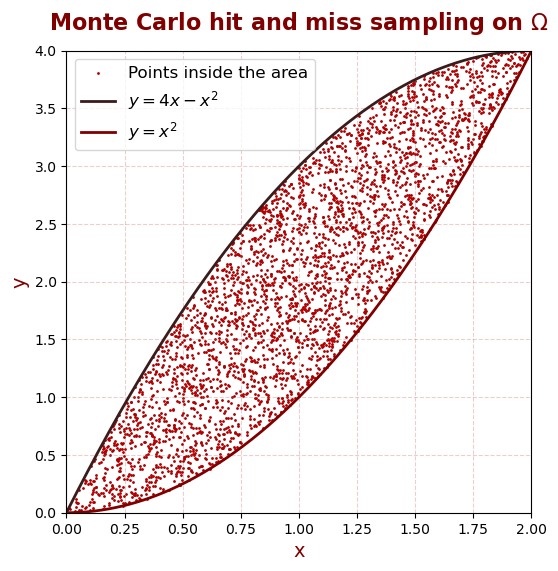

In [9]:
def computeMCarea(n):
    x = np.random.uniform(0, 2, n)
    y = np.random.uniform(0, 4, n)
    inside = (y < 4*x-x**2) & (y > x**2)
    points_inside = zip(x[inside], y[inside])
    frac_inside = np.sum(inside) / n
    area_est = frac_inside * (2 * 4)
    return points_inside, area_est

# Draw the points inside
n = 10000
points_inside, area_est = computeMCarea(n)
plt.figure(figsize=(6,6))
x_in, y_in = zip(*points_inside)
plt.scatter(x_in, y_in, color='#B00000', s=1, label="Points inside the area")
plt.xlim(0, 2)
plt.ylim(0, 4)
plt.title(r"Monte Carlo hit and miss sampling on $\Omega$", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("x", fontsize=14, color='#800000')
plt.ylabel("y", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12)
#plt.savefig("exercise1_3_points.pdf", format='pdf') 
x = np.linspace(0, 2, 400)
y1 = 4*x - x**2
y2 = x**2
plt.plot(x, y1, color='#3B1C1C', linewidth=2.0, label="$y = 4x - x^2$")
plt.plot(x, y2, color='#800000', linewidth=2.0, label="$y = x^2$")
plt.legend(fontsize=12) 
plt.show()

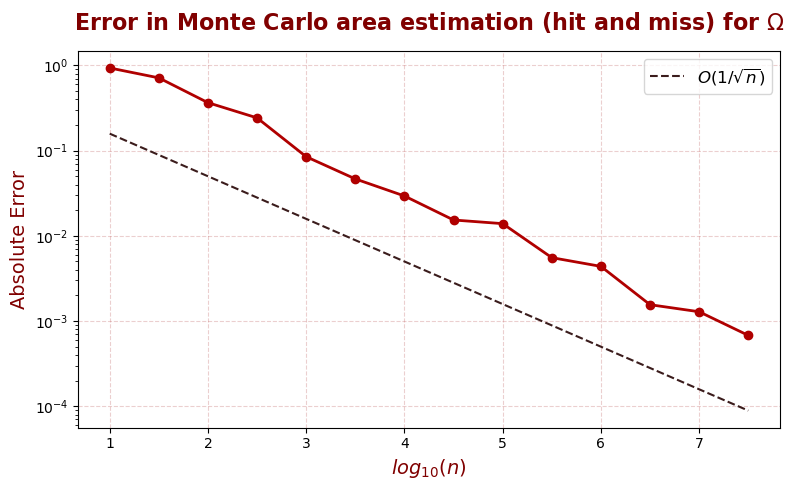

In [11]:
# again, as above, store the errors
diff = []
for exp in np.arange(1,8,0.5):
    n = 10**exp
    tmp = []
    true_area = 8 / 3
    for k in range(10):
        _, area = computeMCarea(int(n))
        tmp.append(abs(area - true_area))
    diff.append(np.mean(tmp))

# plot it
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,8,0.5), diff, marker='o', color='#B00000', linewidth=2.0)
plt.yscale('log')
plt.title(r"Error in Monte Carlo area estimation (hit and miss) for $\Omega$", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("$log_{10}(n)$", fontsize=14, color='#800000')
plt.ylabel("Absolute Error", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout()
n_values = np.arange(1,8,0.5)
ref_line = [0.5 * 10**(-exp/2) for exp in n_values]
plt.plot(n_values, ref_line, linestyle='--', color='#3B1C1C', label="$O(1/\\sqrt{n})$")
plt.legend(fontsize=12)
#plt.savefig("exercise1_3_omega.pdf", format='pdf') 
plt.show()

# Sampling via transformation of coordinates

/tmp/ipykernel_77638/2390816003.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sampled_x[i] = x
/tmp/ipykernel_77638/2390816003.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sampled_y[i] = y


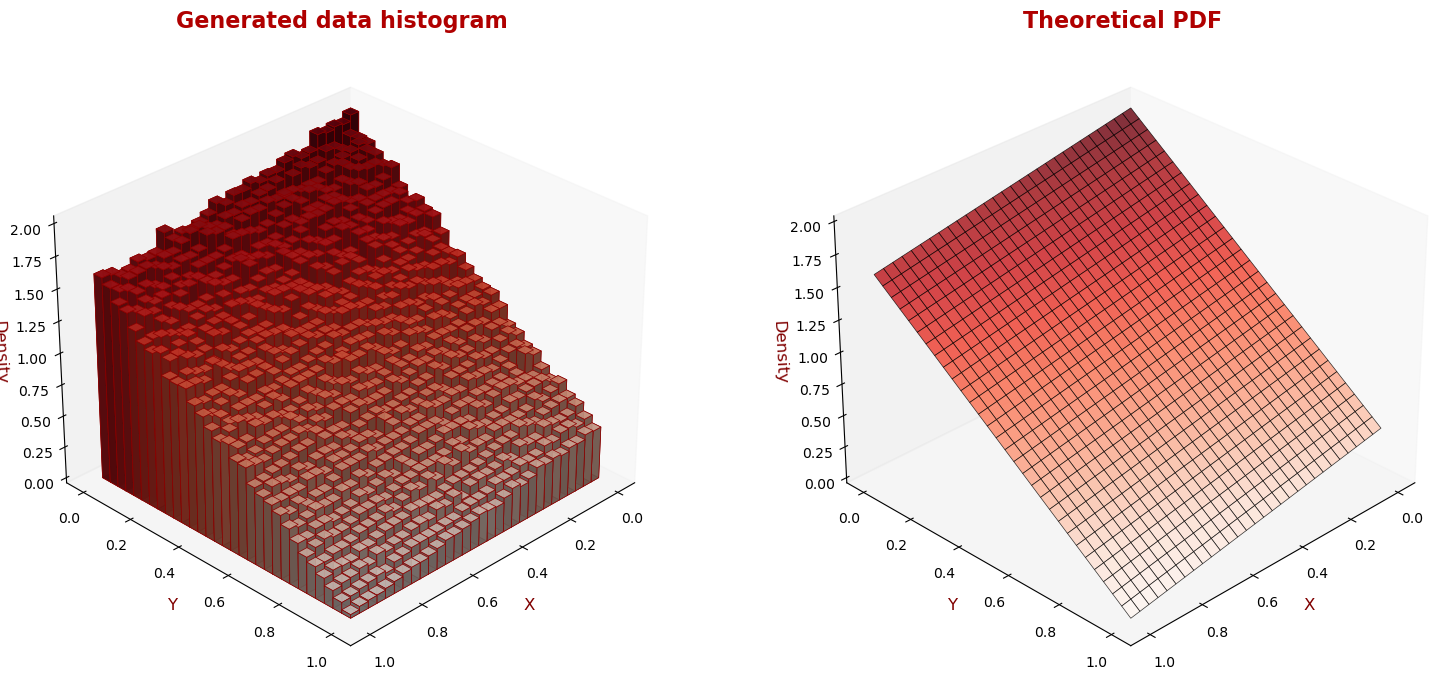

In [12]:
def sampleBilinear(n,a0, a1, a2, a3):
    sampled_x, sampled_y = np.zeros(n), np.zeros(n)
    for i in range(n):
        # Now select y according to its conditional distribution
        a_new = 2*a0+2*a2
        b_new = 2*a1 + 2*a3
        # Sample according to the old function
        x = sampleCustom(1, a_new, b_new)
        a_y = 2*a0*(1-x) + 2*a1*x
        b_y = 2*a2*(1-x) + 2*a3*x
        y = sampleCustom(1, a_y, b_y)
        sampled_x[i] = x
        sampled_y[i] = y
    return sampled_x, sampled_y 

a0, a1, a2, a3 = 10, 8, 2, 0
n = 1000000
sampled_x, sampled_y = sampleBilinear(n, a0, a1, a2, a3)

# 2D histogram
hist, xedges, yedges = np.histogram2d(sampled_x, sampled_y, bins=30, density=True)
# Coordinates for bars
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = hist.ravel()
dx = dy = np.ones_like(zpos) * (xedges[1] - xedges[0])
# Meshgrid
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)
X, Y = np.meshgrid(x, y)
Z = (1-X)*(1-Y)*a0 + X*(1-Y)*a1 + X*Y*a3 + (1-X)*Y*a2
Z = Z / (0.25*a0 + 0.25*(a1+a2) + 0.25*a3)  # Normalization


fig = plt.figure(figsize=(16,7))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
colors = plt.cm.Reds(dz / dz.max())
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, color=colors, edgecolor='darkred', linewidth=0.5, alpha=0.9)
ax1.set_title('Generated data histogram', fontsize=16, weight='bold', color='#B00000', pad=10)
ax1.set_xlabel('X', fontsize=12, color='#800000')
ax1.set_ylabel('Y', fontsize=12, color='#800000')
ax1.set_zlabel('Density', fontsize=12, color='#800000')
ax1.view_init(elev=30, azim=45)
ax1.grid(False)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, alpha=0.8, cmap='Reds', edgecolor='k', linewidth=0.5)
ax2.set_title('Theoretical PDF', fontsize=16, weight='bold', color='#B00000', pad=10)
ax2.set_xlabel('X', fontsize=12, color='#800000')
ax2.set_ylabel('Y', fontsize=12, color='#800000')
ax2.set_zlabel('Density', fontsize=12, color='#800000')
ax2.view_init(elev=30, azim=45)
ax2.grid(False)

plt.tight_layout()
#plt.savefig("3D_histogram_vs_surface.pdf", format='pdf', dpi=300)
plt.show()

# Rejection method

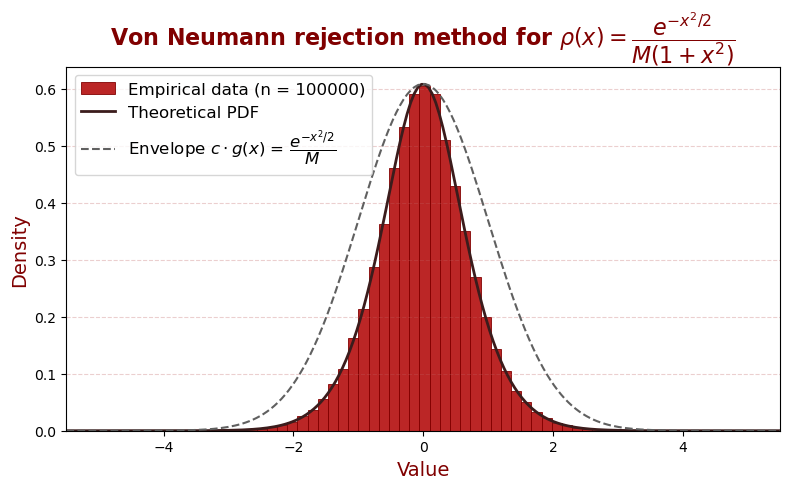

In [14]:
## rho (x) = N(0,1) / (M*(1+x^2))
## choose g(x) = N(0,1), we can sample easily from it
import numpy as np
def sampleRho(n:int):
    samples = []
    while len(samples) < n:    # Keep going until we have n samples
        x = np.random.normal(0, 1)  # Sample from g(x)
        xi = np.random.uniform(0, 1)
        ratio = (1  / (1 + x**2)) 
        if xi < ratio:
            samples.append(x)
    return np.array(samples)

n = 100000
samples = sampleRho(n)

plt.figure(figsize=(8,5))
plt.hist(samples, bins=50, density=True, alpha=0.85, color='#B00000', edgecolor='#800000',  linewidth=0.7, label=f"Empirical data (n = {n})")   

support = np.linspace(-5.5,5.5, 200)
pdf = np.exp(-0.5 * support**2) / (1 + support**2)
M = 1.643544880
normalized_pdf = pdf / M    
plt.plot(support,normalized_pdf,color="#3B1C1C",linewidth=2.0,label="Theoretical PDF")
g = np.exp(-0.5 * support**2) / M
plt.plot(support,g,color="#606060",linestyle='--',linewidth=1.5,label=r"Envelope $c \cdot g(x)$ = $\dfrac{e^{-x^2/2}}{M}$")
plt.title(r"Von Neumann rejection method for $\rho(x) = \dfrac{e^{-x^2/2}}{M(1+x^2)}$",fontsize=16,weight='bold',color='#800000',pad=15)
# x scale?
plt.xlim(-5.5, 5.5)
plt.xlabel("Value", fontsize=14, color='#800000')
plt.ylabel("Density", fontsize=14, color='#800000')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
#plt.savefig("exercise1_4.pdf", format='pdf')
plt.show()